In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import hsv
import matplotlib.patches as mpatches
!pip install pmdarima
from pmdarima.arima import auto_arima, ADFTest


In [2]:
#loading data 
df=pd.read_csv("/Users/atif/Downloads/indexProcessed.csv")
df_info = pd.read_csv("/Users/atif/Downloads/indexInfo.csv")

In [4]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [46]:
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR
10,Korea,Korea Exchange,KS11,KRW


In [6]:
#merging index information with the stock price data
df_merge = df.merge(df_info, on = "Index", how = "inner" )
df_merge

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD
...,...,...,...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578,South Africa,Johannesburg Stock Exchange,ZAR
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859,South Africa,Johannesburg Stock Exchange,ZAR
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500,South Africa,Johannesburg Stock Exchange,ZAR
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157,South Africa,Johannesburg Stock Exchange,ZAR


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
 9   Region     104224 non-null  object 
 10  Exchange   104224 non-null  object 
 11  Currency   104224 non-null  object 
dtypes: float64(7), object(5)
memory usage: 10.3+ MB


In [38]:
#Converting data types
df_merge['Date'] = pd.to_datetime(df_merge['Date'])
df_merge['Index'] = df_merge['Index'].astype('category')
df_merge['Region'] = df_merge['Region'].astype('category')
df_merge['Exchange'] = df_merge['Exchange'].astype('category')
df_merge['Currency'] = df_merge['Currency'].astype('category')

In [39]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      104224 non-null  category      
 1   Date       104224 non-null  datetime64[ns]
 2   Open       104224 non-null  float64       
 3   High       104224 non-null  float64       
 4   Low        104224 non-null  float64       
 5   Close      104224 non-null  float64       
 6   Adj Close  104224 non-null  float64       
 7   Volume     104224 non-null  float64       
 8   CloseUSD   104224 non-null  float64       
 9   Region     104224 non-null  category      
 10  Exchange   104224 non-null  category      
 11  Currency   104224 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(7)
memory usage: 7.6 MB


In [8]:
df.Index.value_counts()

NYA          13947
N225         13874
IXIC         12690
GSPTSE       10526
HSI           8492
GDAXI         8438
SSMI          7671
TWII          5869
000001.SS     5791
399001.SZ     5760
N100          5474
NSEI          3346
J203.JO       2346
Name: Index, dtype: int64

In [9]:
#check for missing values
df_merge.isnull().any()

Index        False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
CloseUSD     False
Region       False
Exchange     False
Currency     False
dtype: bool

In [9]:
#extracting Canada stock price index
options = ["Canada"]
df_se = df_merge[df_merge["Region"].isin(options)]
df_se.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
66028,GSPTSE,1979-06-29,1614.699951,1619.800049,1614.699951,1618.400024,1614.290039,0.0,1343.272020,Canada,Toronto Stock Exchange,CAD
66029,GSPTSE,1979-07-03,1613.599976,1613.599976,1601.699951,1602.800049,1598.729858,0.0,1330.324041,Canada,Toronto Stock Exchange,CAD
66030,GSPTSE,1979-07-04,1601.500000,1601.500000,1589.500000,1591.400024,1587.358765,0.0,1320.862020,Canada,Toronto Stock Exchange,CAD
66031,GSPTSE,1979-07-05,1590.000000,1590.000000,1582.500000,1583.900024,1579.877686,0.0,1314.637020,Canada,Toronto Stock Exchange,CAD
66032,GSPTSE,1979-07-06,1583.900024,1586.599976,1578.300049,1586.599976,1582.570923,0.0,1316.877980,Canada,Toronto Stock Exchange,CAD


In [10]:
#extracting New York stock price index
options = ["NYA"]
df_se_nyc = df_merge[df_merge["Index"].isin(options)]
df_se_nyc.head()


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002,United States,New York Stock Exchange,USD
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022,United States,New York Stock Exchange,USD
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027,United States,New York Stock Exchange,USD
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995,United States,New York Stock Exchange,USD
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007,United States,New York Stock Exchange,USD


In [75]:
adf_test = ADFTest(alpha=0.05)
print(adf_test.should_diff(df_se[['CloseUSD', 'Date']].set_index('Date')))

(0.05151399491298476, True)


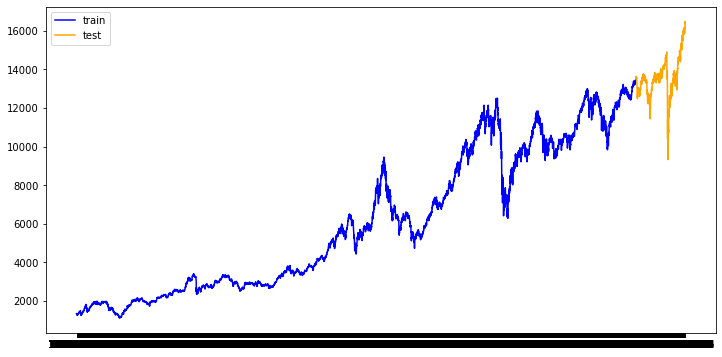

In [11]:
#dividing test and train data
GSPTSE = df_se
GSPTSE = GSPTSE.sort_values('Date').reset_index(drop=True)
train_df = GSPTSE[GSPTSE['Date'] < '2018'][['CloseUSD', 'Date']].set_index('Date')
test_df = GSPTSE[GSPTSE['Date'] >= '2018'][['CloseUSD', 'Date']].set_index('Date')

#ploting Canada stock price index
fig = plt.figure(figsize=(12, 6))
plt.plot(train_df, color='blue')
plt.plot(test_df, color='orange')
plt.legend(['train', 'test'])

In [12]:
#Using auto arima to select the arima model
arima_model = auto_arima(train_df,trace=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=109620.608, Time=5.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=109633.635, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=109632.885, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=109632.691, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=109634.717, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=109620.111, Time=2.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=109623.968, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=109629.848, Time=1.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=109621.388, Time=3.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=109625.943, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=109626.204, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=109622.843, Time=3.98 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=109621.792, Time=0.85 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 20.952 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9669
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -54805.055
Date:                Fri, 20 May 2022   AIC                         109620.111
Time:                        19:52:39   BIC                         109655.994
Sample:                             0   HQIC                        109632.277
                               - 9669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3600      0.232      1.555      0.120      -0.094       0.814
ar.L1          0.7126      0.054     13.263      0.000       0.607       0.818
ma.L1         -0.6958      0.054    -12.908      0.000      -0.801      -0.590
ma.L2         -0.0415      0.005     -8.977      0.000      -0.051      -0.032
sigma2      4912.5190     25.517    192.522      0.000    4862.507    4962.531
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85375.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              31.41   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Best model defined is the ARIMA(1,1,2)(0,0,0)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9669
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -54805.055
Date:                Fri, 20 May 2022   AIC                         109620.111
Time:                        19:53:32   BIC                         109655.994
Sample:                             0   HQIC                        109632.277
                               - 9669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3600      0.232      1.555      0.120      -0.094       0.814
ar.L1          0.7126      0.054     13.263      0.000       0.607       0.818
ma.L1         -0.6958      0.054    -12.908      0.000      -0.801      -0.590
ma.L2         -0.0415      0.005     -8.977      0.000      -0.051      -0.032
sigma2      4912.5190     25.517    192.522      0.000    4862.507    4962.531
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85375.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              31.41   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
arima_model.pvalues().round(2)

array([0.12, 0.  , 0.  , 0.  , 0.  ])

In [15]:
arima_model.params()

array([ 3.59989578e-01,  7.12593283e-01, -6.95843189e-01, -4.15215024e-02,
        4.91251903e+03])

In [16]:
arima_model.conf_int(train_df)

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]]])

In [17]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test_df)), index=test_df.index)
prediction.columns = ['CloseUSD']
prediction
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9669
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -54805.055
Date:                Fri, 20 May 2022   AIC                         109620.111
Time:                        19:54:22   BIC                         109655.994
Sample:                             0   HQIC                        109632.277
                               - 9669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3600      0.232      1.555      0.120      -0.094       0.814
ar.L1          0.7126      0.054     13.263      0.000       0.607       0.818
ma.L1         -0.6958      0.054    -12.908      0.000      -0.801      -0.590
ma.L2         -0.0415      0.005     -8.977      0.000      -0.051      -0.032
sigma2      4912.5190     25.517    192.522      0.000    4862.507    4962.531
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85375.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              31.41   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

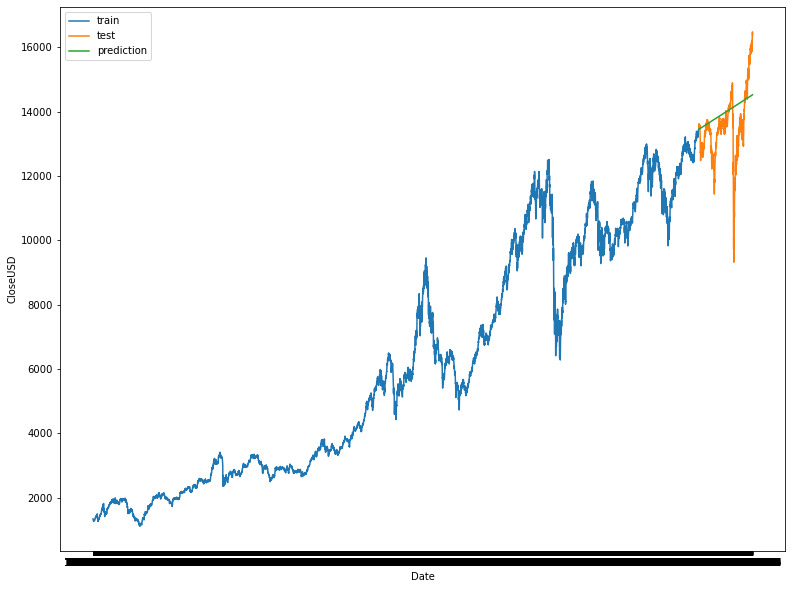

In [18]:
#plot the preciction values from 2018 to 2020 against actual values
plt.figure(figsize=(13,10))
sns.lineplot(x=train_df.index, y=train_df['CloseUSD'])
sns.lineplot(x=test_df.index, y=test_df['CloseUSD'])
sns.lineplot(x=prediction.index, y=prediction['CloseUSD'])
plt.legend(['train', 'test', 'prediction'])

In [20]:
#print(np.sqrt(metrics.mean_squared_error(test_df['CloseUSD'],prediction)))

In [21]:
test_df1 = GSPTSE[GSPTSE['Date'] >= '2018'][['CloseUSD']]
prediction1=prediction['CloseUSD']

In [23]:
#calculating prediction error
forecast_error=test_df['CloseUSD']-prediction['CloseUSD']
print(forecast_error)

Date
2018-01-02      84.155155
2018-01-03     134.767733
2018-01-04     168.320335
2018-01-05     114.737258
2018-01-08      87.440398
                 ...     
2021-05-25    1720.456148
2021-05-26    1869.765927
2021-05-27    1892.500707
2021-05-28    1955.821192
2021-05-31    1853.973295
Name: CloseUSD, Length: 857, dtype: float64


In [24]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-420.1138217003451

In [25]:
test_df1

,CloseUSD
9669,13537.300000
9670,13588.427676
9671,13622.707324
9672,13570.002324
9673,13543.691166
...,...
10521,16238.202676
10522,16388.765000
10523,16412.752324
10524,16477.325353


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(test_df['CloseUSD'], prediction['CloseUSD']) 

1026965.9341737715

In [27]:
# RMSE
mean_squared_error(test_df['CloseUSD'], prediction['CloseUSD'], squared=False)           

1013.3932771504711

In [28]:
# MAE
mean_absolute_error(test_df['CloseUSD'], prediction['CloseUSD']) 

729.6974041357041

In [29]:
df_info.drop(labels=4, axis=0, inplace=True)

In [30]:
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR
10,Korea,Korea Exchange,KS11,KRW


In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104224 entries, 0 to 104223
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
 9   Region     104224 non-null  object 
 10  Exchange   104224 non-null  object 
 11  Currency   104224 non-null  object 
dtypes: float64(7), object(5)
memory usage: 10.3+ MB


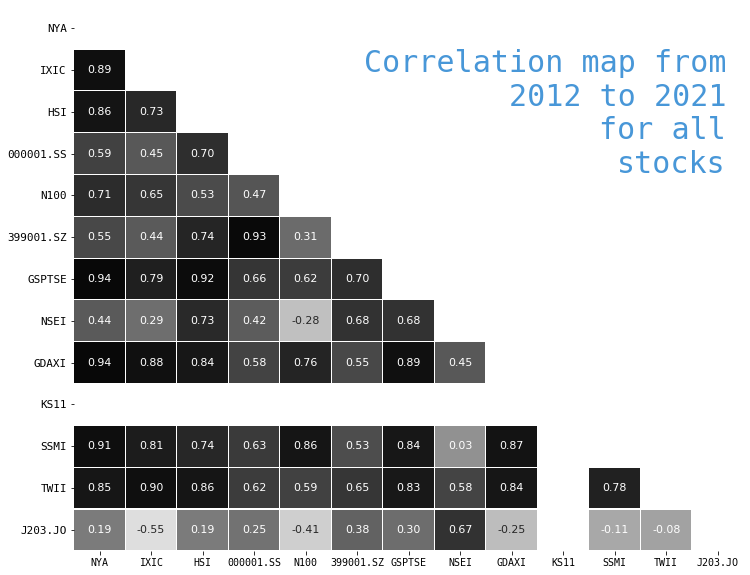

In [42]:
#correlation between different stock index prices
corr_map = pd.DataFrame()
for stock in df_info['Index'].tolist():
    corr_map[stock] = df_merge.query("Index == @stock & Date >= 2000")['Close'].reset_index()['Close']

matrix = np.triu(corr_map.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(corr_map.corr(), annot = True, cmap = 'Greys', fmt=".2f", mask = matrix, vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False, annot_kws = {'fontsize': 11})
plt.xticks(size = 10, fontname = 'monospace')
plt.yticks(size = 11, fontname = 'monospace')
plt.figtext(0.88, 0.65, '''Correlation map from
2012 to 2021
for all
stocks''', fontsize = 30, fontname = 'monospace', ha = 'right', color = '#4897d8')
plt.show()

In [48]:
Canada = df_se[df_se['Date'] > '2012'][['CloseUSD', 'Date']].set_index('Date')
US = df_se_nyc[df_se_nyc['Date'] > '2012'][['CloseUSD', 'Date']].set_index('Date')

In [49]:
Canada.count()

CloseUSD    2362
dtype: int64

In [50]:
Canada.head()

,CloseUSD
Date,
2012-01-03,10132.972324
2012-01-04,10147.995000
2012-01-05,10157.042324
2012-01-06,10116.537676
2012-01-09,10123.261166


In [278]:
US.count()

CloseUSD    2367
dtype: int64

In [282]:
US.tail()

,CloseUSD
Date,
2021-05-24,16464.68945
2021-05-25,16390.18945
2021-05-26,16451.96094
2021-05-27,16531.94922
2021-05-28,16555.66016


In [159]:
corrMatrix = Canada['CloseUSD'].corr(US['CloseUSD'])
print (corrMatrix)


0.6083383915808755


In [245]:

from scipy.stats import shapiro

stat, p = shapiro(df_se_nyc['CloseUSD'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.811, p=0.000
Probably not Gaussian


In [246]:

from scipy.stats import normaltest

stat, p = normaltest(df_se_nyc['CloseUSD'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=4705.768, p=0.000
Probably not Gaussian


In [259]:
from sklearn import preprocessing

x=df_se_nyc['CloseUSD'].values.reshape(-1,1)


In [264]:
d = preprocessing.normalize(x)

scaled_df = pd.DataFrame(x)
scaled_df

,0
0,528.690002
1,527.210022
2,527.840027
3,531.119995
4,532.070007
...,...
26632,13661.169920
26633,13657.169920
26634,13738.000000
26635,13736.280270


In [265]:
#normality test for 
from scipy.stats import shapiro

stat, p = shapiro(scaled_df)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.811, p=0.000
Probably not Gaussian


/Users/atif/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [295]:
Canada1 = df_se[df_se['Date'] > '2012'][['CloseUSD', 'Date']].set_index('Date')
US1 = df_se_nyc[df_se_nyc['Date'] > '2012'][['CloseUSD', 'Date']].set_index('Date')

In [298]:
Canada1.reset_index(drop=True, inplace=True)
US1.reset_index(drop=True, inplace=True)

In [319]:
US1.tail()

,CloseUSD
2357,16422.96094
2358,16337.73047
2359,16233.32031
2360,16350.45020
2361,16375.00000


In [299]:
Canada1.count()

CloseUSD    2362
dtype: int64

In [318]:
US1.count()

CloseUSD    2362
dtype: int64

In [317]:
US1.drop(labels=2363 , axis=0, inplace=True)

In [332]:
# Pearson's Correlation test for GSPTSE & NYA stock exchange index
from scipy.stats import pearsonr
GSPTSE = Canada1['CloseUSD']
NYA = US1['CloseUSD']
stat, p = pearsonr(GSPTSE, NYA)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('GSPTSE(Toronto) & NYA(New York) stock index are not correlated')
else:
	print('GSPTSE(Toronto) & NYA(New York) stock index are correlated with each other')

stat=0.965, p=0.000
GSPTSE(Toronto) & NYA(New York) stock index are correlated with each other


In [338]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
GSPTSE = Canada1['CloseUSD']
NYA = US1['CloseUSD']
stat, p = ttest_ind(GSPTSE, NYA)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=22.106, p=0.000
Probably different distributions


In [377]:
Canada1.head()

,CloseUSD
0,10132.972324
1,10147.995000
2,10157.042324
3,10116.537676
4,10123.261166


In [324]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
GSPTSE = Canada1['CloseUSD']
NYA = US1['CloseUSD']
stat, p = f_oneway(GSPTSE, NYA)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=488.669, p=0.000
Probably different distributions


<AxesSubplot:ylabel='Density'>

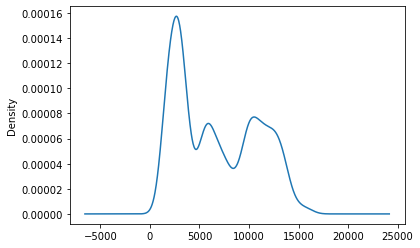

In [325]:
df_close = df_se['CloseUSD']
df_close.plot(kind='kde')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=109633.635, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=109632.885, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=109632.691, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=109634.717, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=109629.848, Time=1.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=109626.204, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=109624.259, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=109626.221, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=109628.217, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=109625.441, Time=0.32 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 4.893 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9669
Model:               SARIMAX(2, 1, 0)   Lo

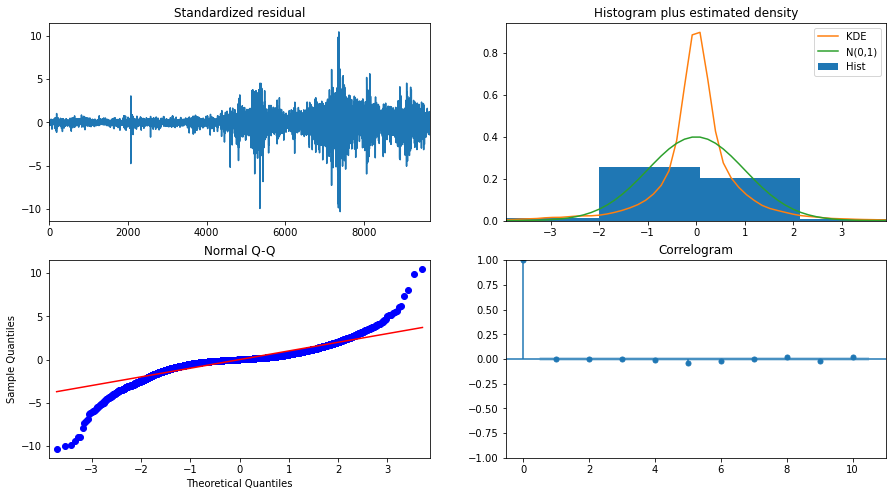

In [326]:
model_autoARIMA = auto_arima(train_df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [349]:
prediction = pd.DataFrame(model_autoARIMA.predict(n_periods=len(test_df)), index=test_df.index)
prediction.columns = ['CloseUSD']
prediction
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9669
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -54805.055
Date:                Wed, 01 Dec 2021   AIC                         109620.111
Time:                        00:29:57   BIC                         109655.994
Sample:                             0   HQIC                        109632.277
                               - 9669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3600      0.232      1.555      0.120      -0.094       0.814
ar.L1          0.7126      0.054     13.263      0.000       0.607       0.818
ma.L1         -0.6958      0.054    -12.908      0.000      -0.801      -0.590
ma.L2         -0.0415      0.005     -8.977      0.000      -0.051      -0.032
sigma2      4912.5190     25.517    192.522      0.000    4862.507    4962.531
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85375.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              31.41   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

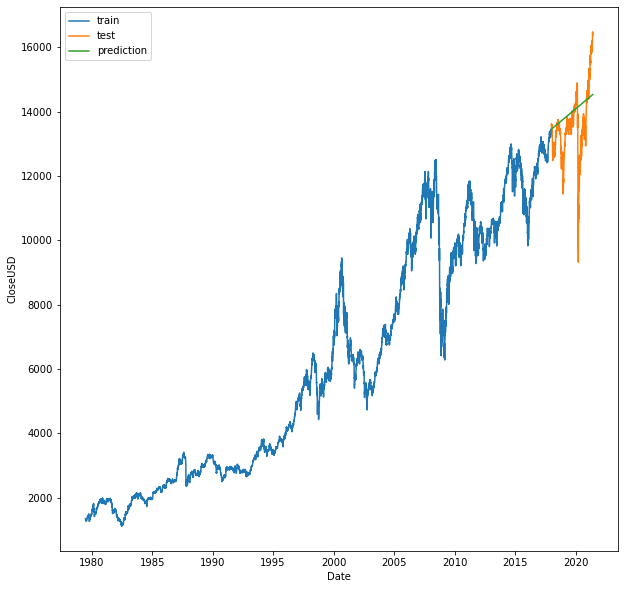

In [350]:
plt.figure(figsize=(10,10))
sns.lineplot(x=train_df.index, y=train_df['CloseUSD'])
sns.lineplot(x=test_df.index, y=test_df['CloseUSD'])
sns.lineplot(x=prediction.index, y=prediction['CloseUSD'])
plt.legend(['train', 'test', 'prediction'])

In [328]:
model = auto_arima(train_df, order=(1,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/Users/atif/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


TypeError: fit() missing 1 required positional argument: 'y'

In [329]:
# Forecast
fc, se, conf = fitted.forecast(321, alpha=0.05)  # 95% conf

NameError: name 'fitted' is not defined

In [361]:
prediction

,CloseUSD
Date,
2018-01-02,13454.120978
2018-01-03,13455.760595
2018-01-04,13457.045157
2018-01-05,13458.288023
2018-01-08,13459.541932
...,...
2021-05-25,14523.865300
2021-05-26,14525.120397
2021-05-27,14526.375495


In [358]:
import math

In [365]:
# Model performance
mse = mean_squared_error(test_df, prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_df, prediction)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_df, prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction - test_df)/np.abs(test_df))
print('MAPE: '+str(mape))

MSE: 1030962.2770291074
MAE: 731.8300950634632
RMSE: 1015.3631256989331
MAPE: CloseUSD    0.056522
dtype: float64


In [343]:
from statsmodels.tsa.stattools import adfuller

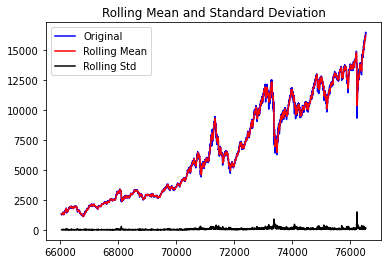

Results of dickey fuller test for GSPTSE:
Test Statistics                   -0.055564
p-value                            0.953689
No. of lags used                  39.000000
Number of observations used    10486.000000
dtype: float64


In [347]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test for GSPTSE:")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    #for key,values in adft[4].items():
        #output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_se['CloseUSD'])

In [368]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-374-d0ba899f5a32>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(train_df, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

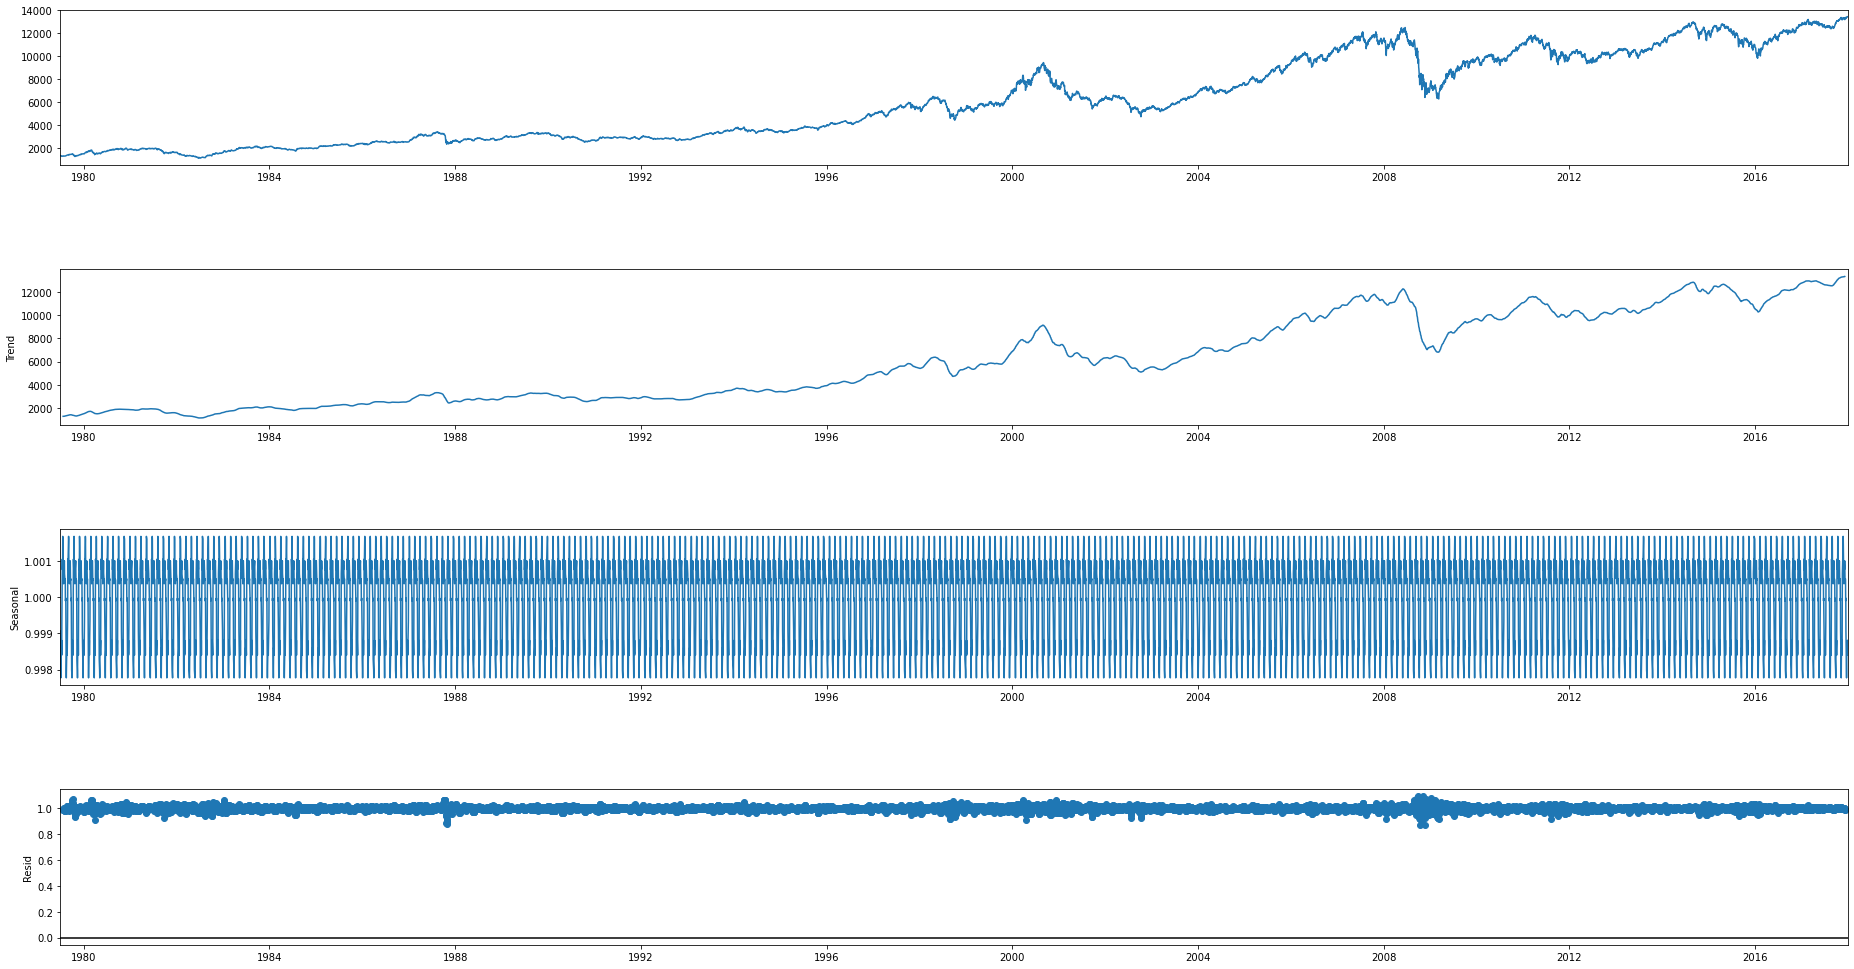

In [374]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(train_df, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(30, 15)

In [378]:
check_seasonality = N100[N100['Date'] > '2010'][['CloseUSD', 'Date']].set_index('Date')

<ipython-input-380-ca39d2a5e5a9>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(check_seasonality, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

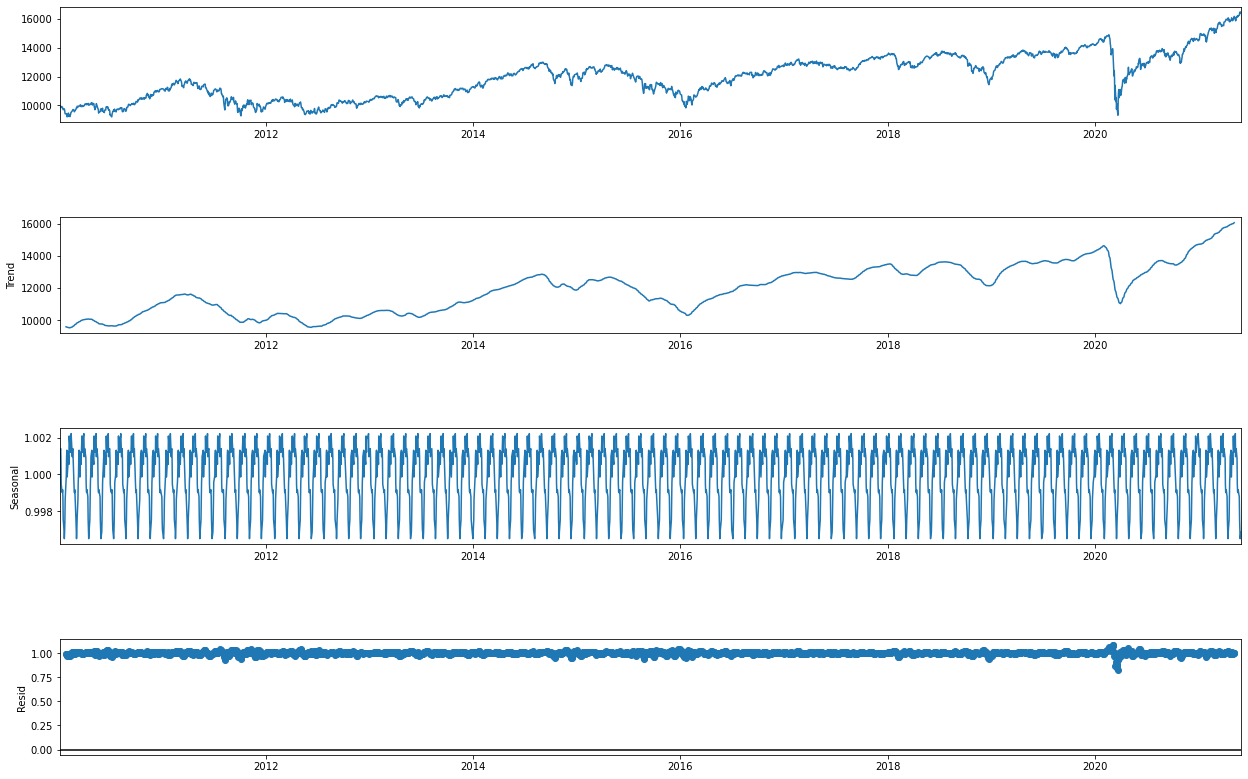

In [380]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(check_seasonality, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 12)

No handles with labels found to put in legend.


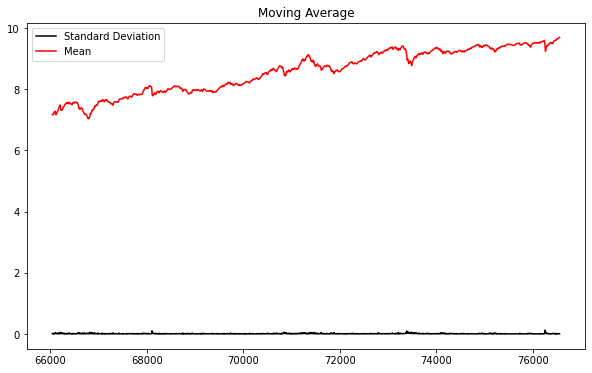

In [382]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_se['CloseUSD'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()